In [1]:
import sys
sys.path.append("../src")

import numpy as np
import matplotlib.pyplot as plt

from pdg_env import PDGGridParallelEnv, PDGPayoffs
from agents import make_agents
from loop_pz import run_simulation

from analysis_PDG import (
    coop_timecourse_mean_sd,
    mean_coop,
    cc_mcc,

    alpha_fit_polyfit
)

SEED = 123
rng = np.random.default_rng(SEED)

PAYOFFS = PDGPayoffs(R=3.0, T=5.0, S=0.0, P=1.0)

# fix parameters
EPSILON = 0.2
P_INIT = 0.5
GRID_SIZE = 10


In [2]:
def make_env(tmax, frac_fr=0.2):
    return PDGGridParallelEnv(
        size=GRID_SIZE,
        ep_leng=tmax,
        payoffs=PAYOFFS,
        frac_fr=0.2
    )

def make_agents_list(n_agents, A, beta, epsilon=EPSILON, p_init=P_INIT):
    return make_agents(n_agents, A=A, beta=beta, epsilon=epsilon, p_init=p_init)

def run_trials(A, beta, tmax, n_trials, seed=SEED, epsilon=EPSILON, p_init=P_INIT, frac = 0.2):
    env = make_env(tmax=tmax, frac_fr=frac)
    agents = make_agents_list(env.n_agents, A=A, beta=beta, epsilon=epsilon, p_init=p_init)
    actions_all, rewards_all, p_all, _ = run_simulation(
        env=env,
        agents=agents,
        n_episodes=n_trials,
        ep_lenght_max=tmax,
        seed=seed,
        render=False
    )
    return env, actions_all, rewards_all, p_all


# Fig2A

In [3]:
tmax_3 = 25
n_trials_3 = 1000  # augmente pour 1000

fig3_settings = [
    ("A", 0.2),
    ("B", 0.5)
]

fig3_curves = {}

for label, F in fig3_settings:
    env, actions_all, _, _ = run_trials(
        A=0.5, beta=0.4, tmax=tmax_3, n_trials=n_trials_3, frac=F
    )
    curves = cc_mcc(actions_all, env.neighbors, t_start=1, t_end=tmax_3)
    fig3_curves[label] = (curves, F)

print("Done Fig 3 sims.")


Done Fig 3 sims.


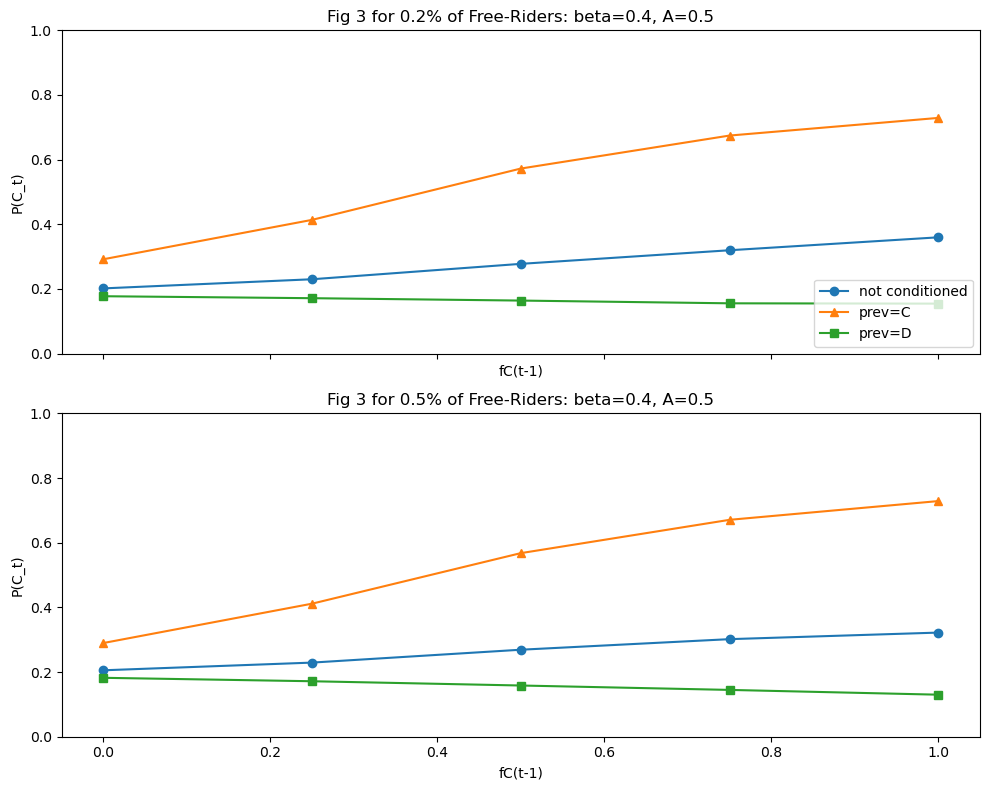

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (label, F) in zip(axes, fig3_settings):
    curves,F = fig3_curves[label]
    f = curves["f_vals"]

    ax.plot(f, curves["pC"], marker="o", label="not conditioned")
    ax.plot(f, curves["pC_C"], marker="^", label="prev=C")
    ax.plot(f, curves["pC_D"], marker="s", label="prev=D")

    ax.set_title(f"Fig 3 for {F}% of Free-Riders: beta={0.4}, A={0.5}")
    ax.set_ylim(0, 1)
    ax.set_xlabel("fC(t-1)")
    ax.set_ylabel("P(C_t)")

axes[0].legend(loc="lower right")
plt.tight_layout()
plt.show()


# PGG